In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
Base = pd.read_csv('/content/Dados_Indendio.csv', encoding='latin-1')

In [4]:
Base.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
Base.shape

(6454, 5)

In [7]:
Base.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [9]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


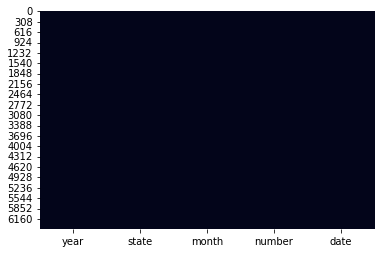

In [11]:
sns.heatmap( Base.isnull(), cbar=False)

In [12]:
Base.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [19]:
#Análise por ano dos incendios
Analise = Base.groupby(by=['year']).sum().reset_index()
Analise.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


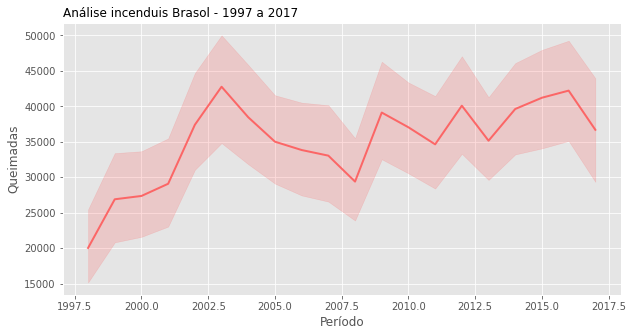

In [28]:
plt.figure(figsize=(10,5))

plt.style.use('ggplot')
plt.title('Análise incenduis Brasol - 1997 a 2017', fontsize=12, loc='left')
sns.lineplot(data=Base, x='year', y='number', estimator=sum, lw=2, color='#ff5555', alpha=0.85)

plt.xlabel('Período')
plt.ylabel('Queimadas');

In [31]:
#registros de incendios por mês
Analise_02 = Base.groupby(by=['year', 'month']).sum().reset_index()

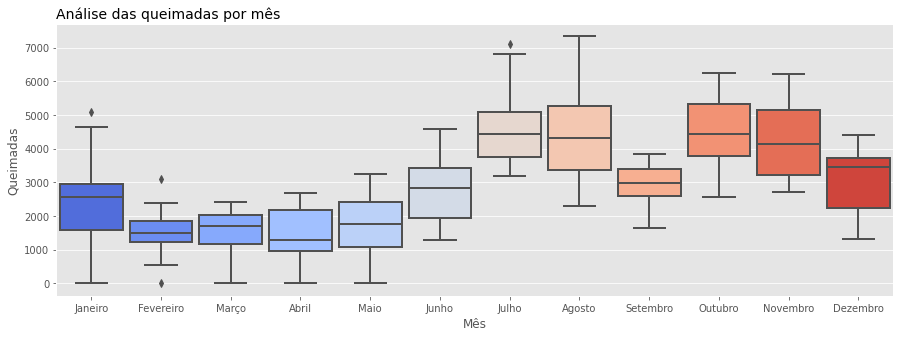

In [39]:
plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.title('Análise das queimadas por mês', fontsize=14, loc='left')
sns.boxplot(data=Analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
#a ordem da apresentação ficou desordenada, assim, existe o código order, onde será digitdo, mes por mes, a sequencia desejavel

plt.xlabel('Mês')
plt.ylabel('Queimadas')
plt.show()

In [45]:
#registro de incendios por estado
Analise_03 = Base.groupby(by=['state']).sum()['number'].reset_index().sort_values('number', ascending=False)
Analise_03

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


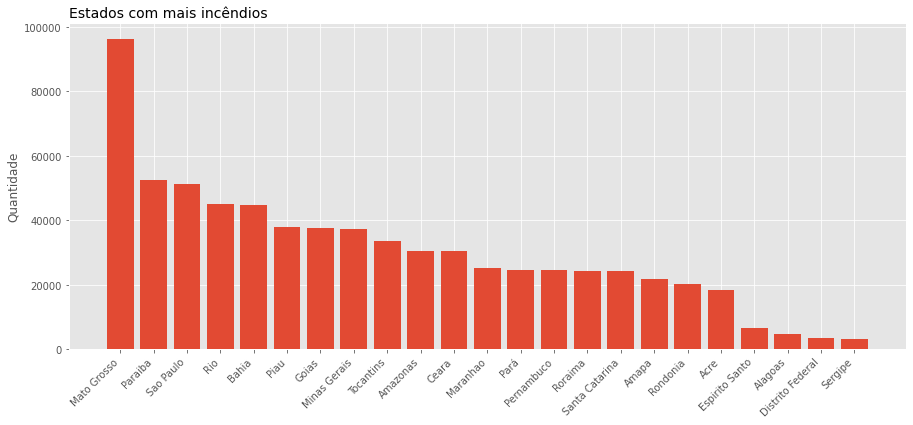

In [50]:
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
plt.title('Estados com mais incêndios', fontsize=14, loc='left')

plt.bar(Analise_03.state, Analise_03['number']) # pode ser feito nas duas formas
plt.xticks(ha='right', rotation=45)
plt.ylabel('Quantidade')
plt.show()

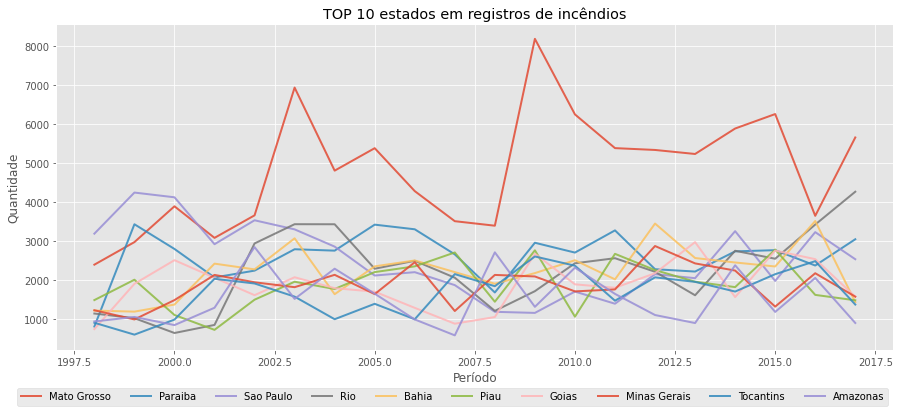

In [74]:
#Estados TOP10
Lista_TOP10 = Analise_03['state'][0:10].values

#tamanho
plt.figure(figsize=(15, 6))
plt.title('TOP 10 estados em registros de incêndios')

for Coluna in Lista_TOP10:
  #filtrar o estado
  Filtro = Base.loc[Base['state'] == Coluna]

  #Agrupar os valores par sumarizar
  Analise_local = Filtro.groupby(by=['year']).sum().reset_index()


  #grafico
#isso aqui, tem que ficar dentro da identação do for.
  
  sns.lineplot(data=Analise_local, x='year', y='number', lw=2, alpha=0.85)

plt.xlabel('Período')
plt.ylabel('Quantidade')

##legenda
plt.legend(Lista_TOP10, bbox_to_anchor=(1, -0.1), ncol=10)

plt.show()

In [75]:
Analise_03.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


In [79]:
#plot geográfico

#gerando os estados
Estados = Analise_03.sort_values('state')['state'].values
Estados
#dessa forma deixou em ordem alfabetica

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Pará', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [84]:
#Gerando os valores
Valores = Analise_03.sort_values('state')['number'].values
Valores

array([18464.03 ,  4644.   , 21831.576, 30650.129, 44746.226, 30428.063,
        3561.   ,  6546.   , 37695.52 , 25129.131, 96246.028, 37475.258,
       52435.918, 24512.144, 24498.   , 37803.747, 45160.865, 20285.429,
       24385.074, 24359.852, 51121.198,  3237.   , 33707.885])

In [85]:
# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,	
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,	
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

In [96]:
#organizando os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}


In [97]:
Analise_geografica = pd.DataFrame(Dicionario)
Analise_geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [98]:
#fazendo plot
import plotly.express as px

In [99]:
#mapa de calor geográfico
px.density_mapbox(
    Analise_geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)

In [162]:
#TENTANDO MONTAR A IMAGEM QUE COMPILA TODOS OS GRÁFICOS
import matplotlib.image as mpimg

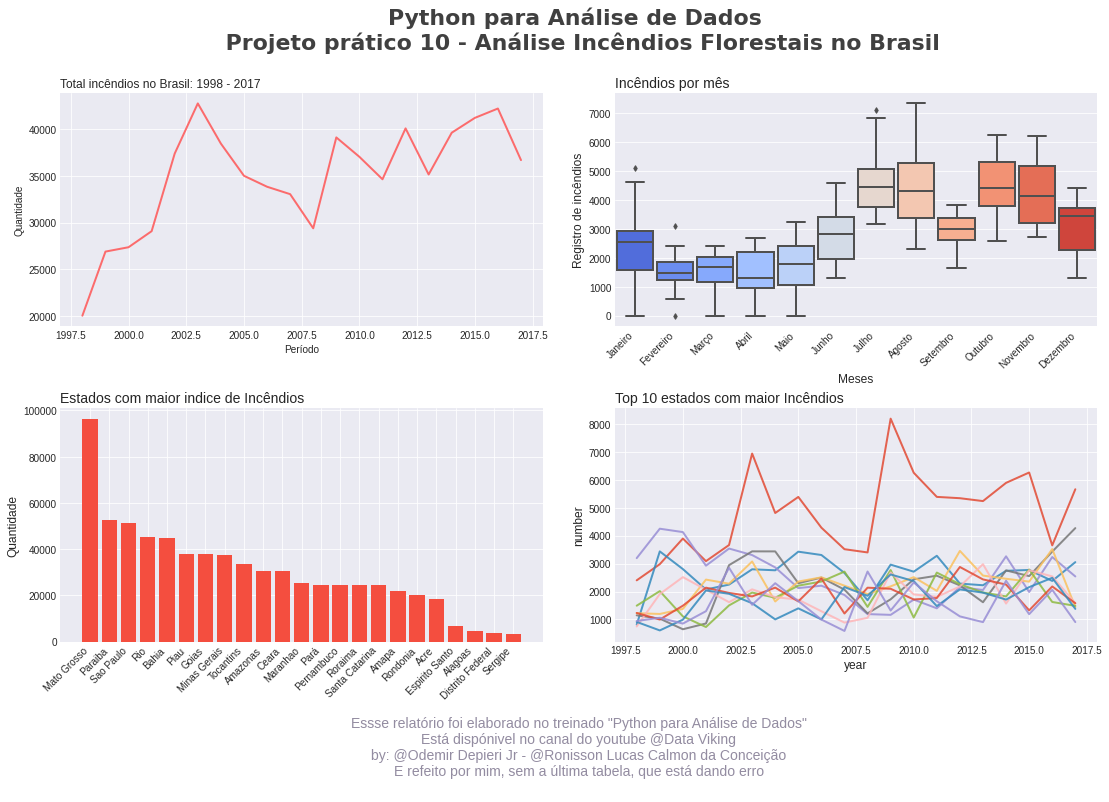

In [185]:

#foi usado modelo diferente 

fig = plt.figure(figsize=(18,15))

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=2)
plt.style.use('seaborn-darkgrid')
#titulo
plt.title('Total incêndios no Brasil: 1998 - 2017', fontsize=12, loc='left')
#gráfico
sns.lineplot(data=Analise, x='year', y = 'number', estimator=sum, color='#FF5555', lw=2, err_style=None, alpha=0.85)
#label
plt.xlabel('Período', fontsize=10)
plt.ylabel('Quantidade', fontsize=10)


ax[1] = plt.subplot2grid((3,4), (0,2), colspan = 2)
plt.style.use('seaborn-darkgrid')
#titulo
plt.title('Incêndios por mês', fontsize=14, loc='left')
#gráfico
sns.boxplot(data=Analise_02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, fliersize=4, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
plt.xlabel('Meses')
plt.ylabel('Registro de incêndios')
plt.xticks(ha='right', rotation=45)

ax[2] = plt.subplot2grid((3,4), (1,0), colspan=2)
plt.title('Estados com maior indice de Incêndios', fontsize=14, loc='left')
plt.bar(Analise_03.state, Analise_03['number'], color='#f44e3f')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

ax[3] = plt.subplot2grid((3,4), (1,2), colspan=2)
plt.style.use('seaborn-darkgrid')
plt.title('Top 10 estados com maior Incêndios', fontsize=14, loc='left')

for Coluna in Lista_TOP10:
  #filtrar o estado
  Filtro = Base.loc[Base['state'] == Coluna]

  #Agrupar os valores par sumarizar
  Analise_local = Filtro.groupby(by=['year']).sum().reset_index()


  #grafico
#isso aqui, tem que ficar dentro da identação do for.
  
  sns.lineplot(data=Analise_local, x='year', y='number', lw=2, alpha=0.85)

#ax[4] = plt.subplot2grid((3,4), (2,0), colspan=4)
#Buraco_Negro = mpimg.imread('5.PNG')
#plt.imshow(Buraco_Negro)
#plt.axis('off')
#plt.title('Visão Geográfica dos Incêndios', loc='left', fontsize=14, fontweight=0 )

#fig.tight_layout()

plt.suptitle(f'Python para Análise de Dados \n Projeto prático 10 - Análise Incêndios Florestais no Brasil', fontsize=22, color='#404040', fontfamily='KyivType Sans', fontweight=600)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.90, wspace=0.35, hspace=0.35)

Rodape='''
Essse relatório foi elaborado no treinado "Python para Análise de Dados"
Está dispónivel no canal do youtube @Data Viking
by: @Odemir Depieri Jr - @Ronisson Lucas Calmon da Conceição
E refeito por mim, sem a última tabela, que está dando erro
'''
fig.text( 0.5, 0.25, Rodape, ha='center', va='bottom', size=14, color='#938ca1');

plt.show()

In [149]:
Filtro.head()

,state,number
